In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# Embedding: Self-Organizing Maps (SOMs) and Locally Linear Embedding (LLE)

## Exercise H9.1: 1d Self-Organizing Map for 2d data

### a) Generate points.

(1000, 2)


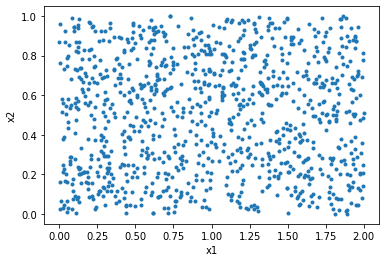

In [ ]:
p = 1000 # number of data points

# X: (1000 x 2)
X_rand = np.random.uniform([0,0], [2,1], size=[p, 2])
print(X_rand.shape)

dim_X = X_rand.shape[-1]
plt.plot(X_rand[:,0], X_rand[:,1], '.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show();

### b) Implement a one-dimensional Self-Organizing Map using a Gaussian neighborhood function.

In [ ]:
def f_gaussian_neighborhood(qp, sigma):
    return np.exp(- (qp ** 2) / ((2 * sigma) ** 2))

def SOM(X, M, w, eta0, sigma0):

    dim_X = X.shape[-1]
    eta = eta0
    sigma = sigma0
   
    count=0
    check=0
    # loop over X
    for i, x_i in enumerate(X):

        count+=1
        # find closest prototype w[p]
        # p, q coordinates of prototypes in map - 1 dimensional!
        p = np.argmin(np.linalg.norm(x_i - w, axis=1))

        if sigma < 0.1 * sigma0:
            eta *= 0.99
            if check == 0:
                print(f'eta starts changing at {count}')
            check+=1

        #if count == 1:
        #    print('x_i', x_i.shape, 'w', w.shape, 'x_i - w', (x_i - w).shape, 'p', p.shape)
        #    print('x_i=', x_i, 'x_i - w=', (x_i - w), 'p= ', p)
            
        # change prototypes according to gaussian neigborhood function: 
        for q, w_q in enumerate(w): 
            #if count==100:
            #    print(w[q], print(eta * f_gaussian_neighborhood(q-p, sigma) * (x_i - w[q]) + w[q]))
            #    print('(x_i - w[q])', (x_i - w[q]))

            w[q] += eta * f_gaussian_neighborhood(q-p, sigma) * (x_i - w[q])
            #w[q] += dw

            #if count == 100:
            #    print(q, '. factor', eta * f_gaussian_neighborhood(q-p, sigma))
            #    print('(x_i - w[q])', (x_i - w[q]))
            #    print(eta * f_gaussian_neighborhood(q-p, sigma) * (x_i - w[q]))
            #    print(w[q])

        sigma *= 0.999

    return w


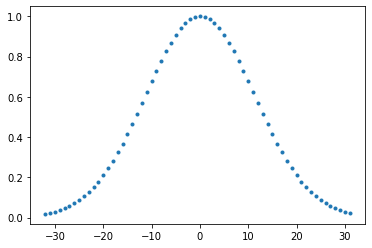

In [ ]:
# test f_gaussian_neighborhood
qp = np.arange(-32,32)
plt.plot(qp, f_gaussian_neighborhood(qp, 32/4), '.')



### c & d) Fit different maps to the data and plot the final map in the original data space.

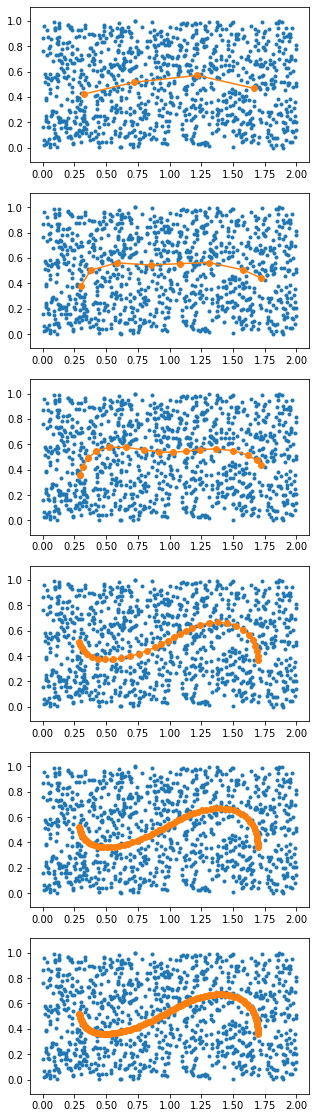

In [ ]:
Ms = [4, 8, 16, 32, 64, 128]

ax = np.zeros(len(Ms))
fig, ax = plt.subplots(len(Ms), figsize=[5, 20])

for i,M in enumerate(Ms):
    # initialise M prototypes: w: (M x dim_X)
    # prototypes w live in input space: two-dimensional
    w = np.ones((M, dim_X)) * np.mean(X_rand, axis=0)
    w += np.random.uniform([-0.2, -0.1], [0.2, 0.1], size=[M, 2])
    
    w = SOM(X_rand, M, w, eta0=0.1, sigma0=M/4)
    ax[i].plot(X_rand[:,0], X_rand[:,1], '.')
    ax[i].plot(w[:,0], w[:,1], 'o', linestyle='-')
    ax[i].axis('equal');

## Exercise H9.2: 1d Self-Organizing Maps for 3d data

### a) Download and visualize the data.

             x         y         z
1     1.049530 -0.036319 -0.045404
2     1.033938 -0.074932  0.041777
3     0.925586  0.063708  0.036055
4     0.959488 -0.069147 -0.029692
5     1.068696  0.028230 -0.060449
...        ...       ...       ...
4996  1.105341  0.044823  4.957300
4997  1.046087 -0.106227  4.982621
4998  0.975804 -0.064792  5.068882
4999  0.997172  0.043531  4.959636
5000  0.999496  0.019667  5.078992

[5000 rows x 3 columns]


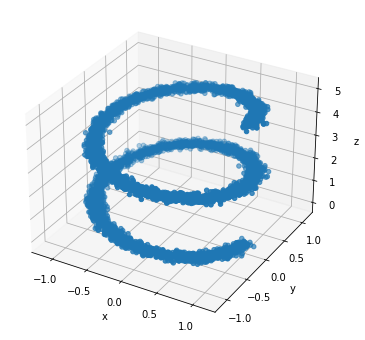

In [ ]:
X_spiral = pd.read_csv('data/spiral.csv', index_col=0)
print(X_spiral)
X_spiral = X_spiral.to_numpy()

fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')

# Visualize 3D scatter plot
ax.scatter3D(X_spiral[:,0], X_spiral[:,1], X_spiral[:,2])
# Give labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

### b, c & d) Adapt/reuse your implementation for SOM to fit one dimensional maps to this dataset, initializing the prototypes. Plot them.


eta starts changing at 2303
eta starts changing at 2303
eta starts changing at 2303
eta starts changing at 2303


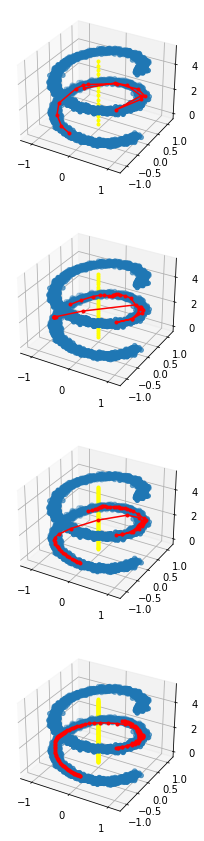

In [ ]:
Ms = [16, 32, 64, 128]
dim_X = 3
fig = plt.figure(figsize=[5, 15])

for i, M in enumerate(Ms):
    
    w = np.zeros((M, dim_X))
    w[:, -1] = np.linspace(0, 5, M)
    w_final = SOM(X_spiral, M, w.copy(), eta0=0.5, sigma0=M/6)
    ax = plt.subplot(len(Ms), 1, i+1, projection='3d')
    ax.scatter3D(X_spiral[:,0], X_spiral[:,1], X_spiral[:,2], zorder=0)
    ax.plot(w[:,0], w[:,1], w[:,2], '.', linestyle='-', color='yellow', zorder=2);    
    ax.plot(w_final[:,0], w_final[:,1], w_final[:,2], '.', linestyle='-', color='red', zorder=3);

## Exercise H9.3: 2d Self-Organizing Maps for 3d data

### a) Visualize the 3d-data in the file.

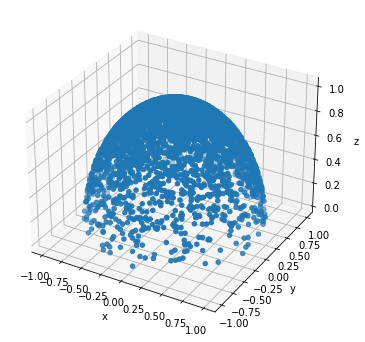

In [ ]:
X_bowl = pd.read_csv('data/bowl.csv', index_col=0)
#print(X)
X_bowl = X_bowl.to_numpy()

fig = plt.figure(figsize=(9, 6))
# Create 3D container
ax = plt.axes(projection = '3d')

# Visualize 3D scatter plot
ax.scatter3D(X_bowl[:,0], X_bowl[:,1], X_bowl[:,2])
# Give labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

### b) Extend your SOM implementation to fit 2-dim maps.

In [ ]:
def f_gaussian_neighborhood_2d(p, q, sigma):
    return np.exp((-np.linalg.norm(q - p) ** 2) / ((2 * sigma) ** 2))

def SOM_2d(X, M, w, eta0=0.1, sigma0=10):
    
    dim_X = X.shape[-1]
    dim_map = 2
    eta = eta0
    sigma = sigma0
   
    #w.shape = M/2 x M/2 x dimX

    count=0
    check=0
    # loop over X

    for i, x_i in enumerate(X):

        count+=1
        # find closest prototype w[p]
        # p, q coordinates of prototypes in map - 2 dimensional!
        norm = np.linalg.norm(x_i - w, axis=2)
        p = np.unravel_index(norm.argmin(), norm.shape)

        if sigma < 0.1 * sigma0:
            eta *= 0.99
            if check == 0:
                print(f'eta starts changing at {count}')
            check+=1

            
        # change prototypes according to gaussian neigborhood function: 
        w_flatten = np.reshape(w, (M, dim_X))
        
        for i, w_q in enumerate(w_flatten):

            q = np.unravel_index(i, norm.shape)            
            w[q] += eta * f_gaussian_neighborhood_2d(np.array(q), np.array(p), sigma) * (x_i - w[q])


        sigma *= 0.999

    return w


### c) Experiment with different ways for initializing the prototypes:

#### (i) randomly.

eta starts changing at 2303
eta starts changing at 2303
eta starts changing at 2303


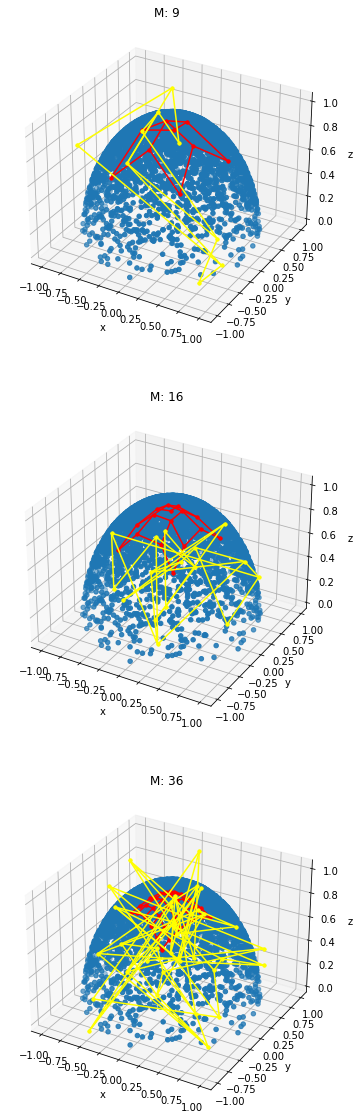

In [ ]:
Ms = [9, 16, 36]

fig = plt.figure(figsize=(20, 20))
# Create 3D container
ax = plt.axes(projection = '3d')
for j, M in enumerate(Ms):
    rng = np.random.default_rng()
    w = rng.uniform([-1, -1, 0], [1,1,1], size=(int(np.sqrt(M)), int(np.sqrt(M)), dim_X))
    
    w_final = SOM_2d(X_bowl, M, np.copy(w), eta0=0.9, sigma0=M/2)

    ax = plt.subplot(len(Ms), 1, j+1, projection='3d')
    ax.scatter3D(X_bowl[:,0], X_bowl[:,1], X_bowl[:,2], zorder=0)  
    #tes = np.reshape(w_final, (M, dim_X))  

    for i in range(int(np.sqrt(M))):
        ax.plot(w[i, :, 0], w[i, :, 1], w[i, :, 2], '.', linestyle='-', color='yellow', zorder=4)
        ax.plot(w[:, i, 0], w[:, i, 1], w[:, i, 2], '.', linestyle='-', color='yellow', zorder=4);

    for i in range(int(np.sqrt(M))):
        ax.plot(w_final[i,:,0], w_final[i,:,1], w_final[i,:,2], '.', linestyle='-', color='red', zorder=3)
        ax.plot(w_final[:,i,0], w_final[:,i,1], w_final[:,i,2], '.', linestyle='-', color='red', zorder=3);

    ax.set_title('M: '+str(M))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    #ax.legend();

#### (ii) in an informed way.

eta starts changing at 2303
eta starts changing at 2303
eta starts changing at 2303


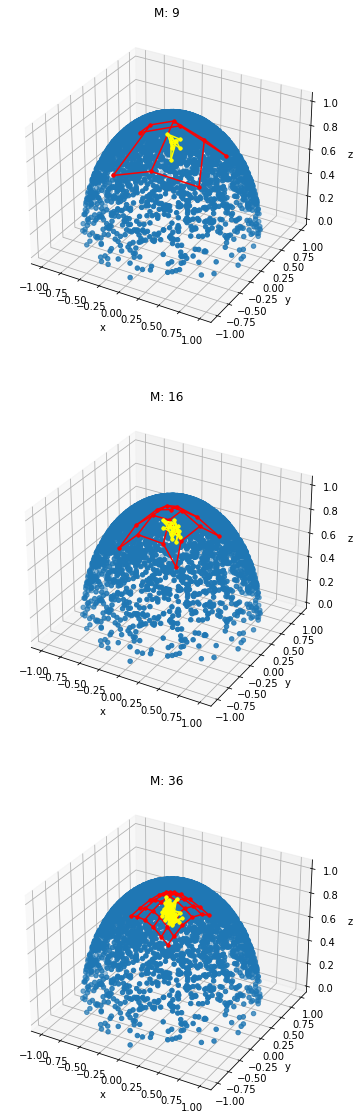

In [ ]:
Ms = [9, 16, 36]

fig = plt.figure(figsize=(20, 20))
# Create 3D container
ax = plt.axes(projection = '3d')
Xdim_ = 3

for j, M in enumerate(Ms):

    rng = np.random.default_rng()
    w = np.ones((int(np.sqrt(M)), int(np.sqrt(M)), dim_X)) * np.mean(X_bowl, axis=0)


    w += rng.uniform([-0.1, -0.1, -0.1], [0.1, 0.1, 0.1], size=(int(np.sqrt(M)), int(np.sqrt(M)), dim_X))
    
    w_final = SOM_2d(X_bowl, M, np.copy(w), eta0=0.5, sigma0=int(M/2))

    ax = plt.subplot(len(Ms), 1, j+1, projection='3d')
    ax.scatter3D(X_bowl[:,0], X_bowl[:,1], X_bowl[:,2], zorder=0)   


    for i in range(int(np.sqrt(M))):
        ax.plot(w[i,:,0], w[i,:,1], w[i,:,2], '.', linestyle='-', color='yellow', zorder=5, label='t0')
        ax.plot(w[:,i,0], w[:,i,1], w[:,i,2], '.', linestyle='-', color='yellow', zorder=5);
    for i in range(int(np.sqrt(M))):
        ax.plot(w_final[i,:,0], w_final[i,:,1], w_final[i,:,2], '.', linestyle='-', color='red', zorder=3, label='final configuration')
        ax.plot(w_final[:,i,0], w_final[:,i,1], w_final[:,i,2], '.', linestyle='-', color='red', zorder=3);
    
    ax.set_title('M: '+str(M))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');

plt.show()



## Exercise H9.4. Locally Linear Embedding.

### 1. Find an off-the-shelf implementation for LLL.

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

### 2. Apply LLE to the toy data, using:

In [ ]:
X_spiral_emb = np.zeros((3, 5000))
X_bowl_emb_1 = np.zeros((3, 5000, 1))
X_bowl_emb_2 = np.zeros((3, 5000, 2))

n_neighbours = [4, 10, 15]  # different numbers of neighbours

for ind, n_neigh in enumerate(n_neighbours):
    embedding_spiral = LocallyLinearEmbedding(n_neighbors=n_neigh, n_components=1)
    X_spiral_emb[ind] = embedding_spiral.fit_transform(X_spiral).flatten()
    embedding1_bowl = LocallyLinearEmbedding(n_neighbors=n_neigh, n_components=1)
    embedding2_bowl = LocallyLinearEmbedding(n_neighbors=n_neigh, n_components=2)
    X_bowl_emb_1[ind, :, :] = embedding1_bowl.fit_transform(X_bowl)
    X_bowl_emb_2[ind, :, :] = embedding2_bowl.fit_transform(X_bowl)

### 3. Plot the data points in embedding space. Only 15 neighbours.

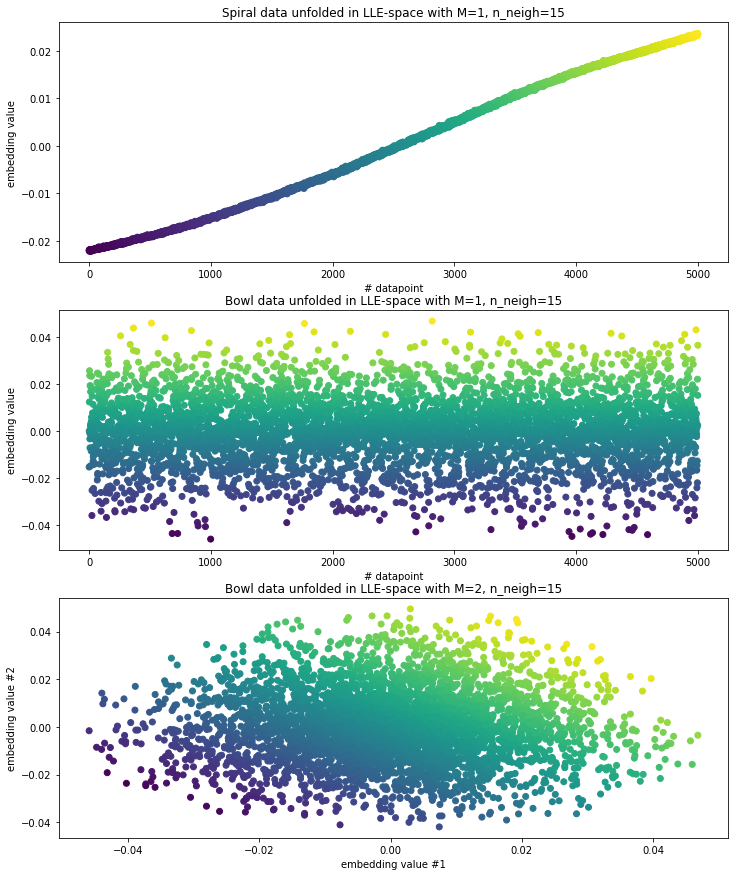

In [ ]:
fig = plt.figure(figsize=(12, 15))
fig.add_subplot(311)
plt.scatter(np.arange(0,len(X_spiral_emb[-1])),X_spiral_emb[-1], c=X_spiral_emb[-1]);
plt.title('Spiral data unfolded in LLE-space with M=1, n_neigh=15')
plt.xlabel('# datapoint')
plt.ylabel('embedding value')

fig.add_subplot(312)
plt.scatter(np.arange(0,len(X_bowl_emb_1[-1])),X_bowl_emb_1[-1],c=X_bowl_emb_1[-1]);
plt.title('Bowl data unfolded in LLE-space with M=1, n_neigh=15')
plt.xlabel('# datapoint')
plt.ylabel('embedding value')

fig.add_subplot(313)
plt.scatter(X_bowl_emb_2[-1, :,0],X_bowl_emb_2[-1,:,1], c=X_bowl_emb_2[-1,:,0]+X_bowl_emb_2[-1,:,1]);
plt.xlabel('embedding value #1')
plt.ylabel('embedding value #2')
plt.title('Bowl data unfolded in LLE-space with M=2, n_neigh=15');

### 4) Plot the data points in data space. Only 15 neighbours.

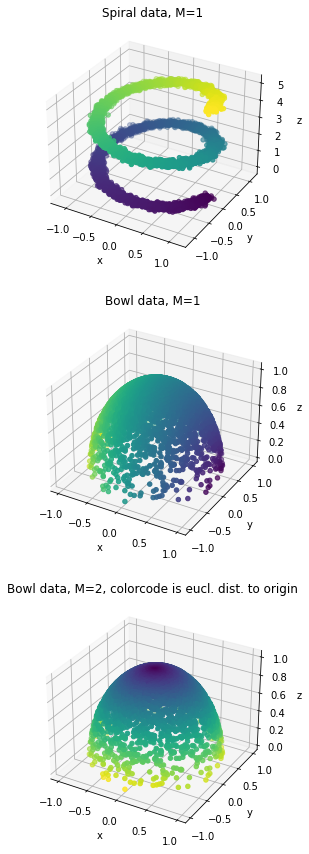

In [ ]:
fig = plt.figure(figsize=(12, 15))

fig.add_subplot(311) 
ax = plt.subplot(3, 1, 1, projection = '3d')
# Visualize 3D scatter plot
ax.scatter3D(X_spiral[:,0], X_spiral[:,1], X_spiral[:,2], c= X_spiral_emb[-1])
# Give labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Spiral data, M=1')

fig.add_subplot(312)
ax1 = plt.subplot(3, 1, 2, projection = '3d')
# Visualize 3D scatter plot
ax1.scatter3D(X_bowl[:,0], X_bowl[:,1], X_bowl[:,2], c= X_bowl_emb_1[-1])
# Give labels
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z');
ax1.set_title('Bowl data, M=1')

fig.add_subplot(313)
ax2 = plt.subplot(3, 1, 3, projection = '3d')
# Visualize 3D scatter plot
ax2.scatter3D(X_bowl[:,0], X_bowl[:,1], X_bowl[:,2], c=np.sqrt(X_bowl_emb_2[-1,:,0]**2+X_bowl_emb_2[-1,:,1]**2))
# Give labels
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z');
ax2.set_title('Bowl data, M=2, colorcode is eucl. dist. to origin');


We computed the LLE for different numbers of neighbours. Shown below are also the results for four or ten neighbours. We can see that for lower numbers of neighbours the results are hard to interpret in the context of the known structure of the datasets. We noticed the increase of computation time, though, that has a term ~O(k**3) for the number of neighbours k.

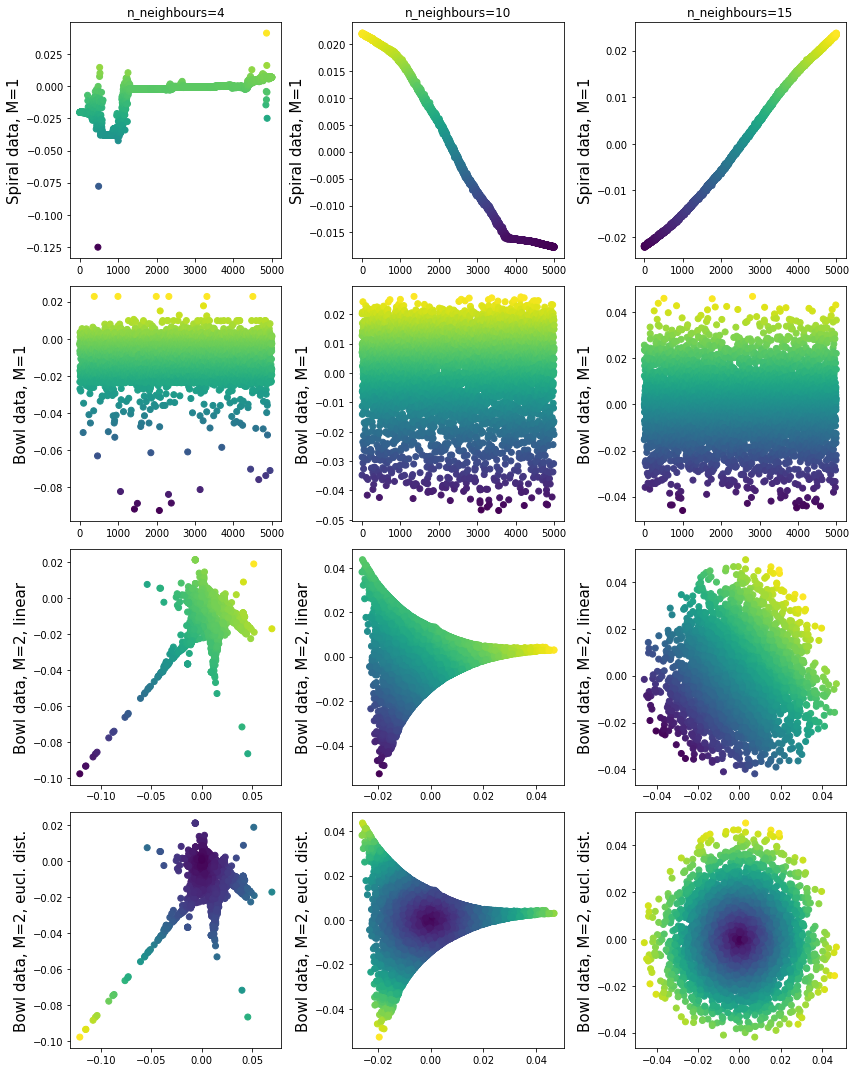

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(12, 15) )

for ind, n_neigh in enumerate(n_neighbours):
    axs[0, ind].scatter(np.arange(0, len(X_spiral_emb[ind])),X_spiral_emb[ind], c=X_spiral_emb[ind]);
    axs[0, ind].set_title('n_neighbours=' +str(n_neigh))
    axs[0, ind].set_ylabel('Spiral data, M=1', fontsize=15)

    axs[1, ind].scatter(np.arange(0,5000), X_bowl_emb_1[ind, :, :], c=X_bowl_emb_1[ind, :, :]);
    axs[1, ind].set_ylabel('Bowl data, M=1', fontsize=15)

    axs[2, ind].scatter(X_bowl_emb_2[ind,:,0],X_bowl_emb_2[ind,:,1], c=X_bowl_emb_2[ind,:,0]+X_bowl_emb_2[ind,:,1]);
    axs[2, ind].set_ylabel('Bowl data, M=2, linear', fontsize=15)

    axs[3, ind].scatter(X_bowl_emb_2[ind,:,0],X_bowl_emb_2[ind,:,1], c=np.sqrt(X_bowl_emb_2[ind,:,0]**2+X_bowl_emb_2[ind,:,1]**2));
    axs[3, ind].set_ylabel('Bowl data, M=2, eucl. dist.', fontsize=15)

fig.tight_layout();
